In [2]:
from typing import List, Callable
import matplotlib.pyplot as plt
import math
import inspect

In [3]:
def float_range(start: float, end: float, step: float) -> List[float]:
    """Compute float range from start to end with step."""
    if step == 0:
        raise ValueError('step must not be zero')

    # Same behavior as range method.
    if abs(step) > abs(start - end):
        return [start]
    if step > 0 and end - start < 0:
        return []
    elif step < 0 and end - start > 0:
        return []

    # Digit for round decimal.
    exp = len(str(step).split('.')[1])

    result = [start]
    val = start
    if step > 0:
        while (val := round(val + step, exp)) < end:
            result.append(val)
    else:
        while (val := round(val + step, exp)) > end:
            result.append(val)
    return result

def schilick_fresnel_by_f0(cos_i: float, f0: float) -> float:
    f0 = f0 * f0
    fresnel = f0 + (1 - f0) * pow((1 - cos_i), 5)
    return fresnel

def schilick_fresnel_by_ior(cos_i: float, ni: float, nt: float) -> float:
    f0 = (ni - nt) / (ni + nt)
    f0 = f0 * f0
    fresnel = schilick_fresnel_by_f0(cos_i, f0)
    return fresnel

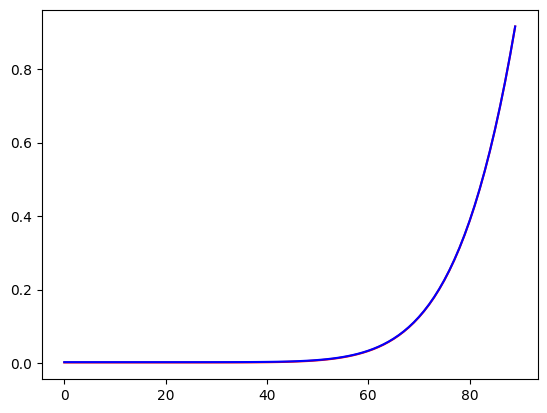

In [4]:
def calc_fresnel(fresnle_func: Callable, frange_degree: List[float], **kwargs) -> List[float]:
    arg_num_func = len(inspect.signature(fresnle_func).parameters)
    fresnel = []

    for theta_degree in frange_degree:
        theta = math.radians(theta_degree)
        cos_i = math.cos(theta)
        if arg_num_func == 2:
            f = fresnle_func(cos_i, kwargs["f0"])
        else:
            f = fresnle_func(cos_i, kwargs["ni"], kwargs["nt"])
        fresnel.append(f)

    return fresnel

frange_degree = float_range(start=0.0, end=90.0, step=1.0)

#a = calc_fresnel(schilick_fresnel_by_f0, frange_degree, f0=0.95)
a = calc_fresnel(schilick_fresnel_by_ior, frange_degree, ni=1.0, nt=1.5)
b = calc_fresnel(schilick_fresnel_by_f0, frange_degree, f0=0.05)

plt.plot(frange_degree, a, color="red", label="a")
plt.plot(frange_degree, b, color="blue", label="b")